# Pêndulo e caos

## Parte 1: Pêndulo simples (regime linear)

O pêndulo simples é constituído por uma haste indeformável de comprimento $\ell$ e de massa desprezível presa a um ponto em torno do qual pode rodar livremente em um plano fixo e com uma massa pontual $m$ na outra extremidade. A massa é sujeita à ação de um campo gravitacional uniforme com aceleração $g$. O grau de liberdade do pêndulo pode ser representado por um ângulo $\theta$ em relação à vertical, como na figura abaixo

![Pêndulo](./pendulum-small.png)

Como a haste é indeformável, a tensão na haste compensa a componente da força da gravidade paralela à haste. A força resultante na massa será então a componente perpendicular à haste:

$$ F = - m g \sin \theta. $$

(O sinal negativo é devido ao fato de que a força age na direção oposta ao sentido positivo do ângulo $\theta$). Por outro lado,

$$F = m \frac{d^2 x}{dt^2},$$

onde $d x$ é o deslocamento infinitesimal linear da massa. Este pode ser calculado como $dx = \ell d\theta$, o que nos leva a

$$ m \ell \frac{d^2\theta}{dt^2} = - m g \sin \theta,$$

resultando na conhecida equação diferencial de segunda ordem:

$$ \frac{d^2\theta}{dt^2} = -\frac{g}{\ell}\sin\theta.$$

Em princípio, como dispomos de equação diferencial que descreve o nosso modelo, seríamos capazes de, dadas as condicões inciais, calcular o comportamento futuro do pêndulo. Infelizmente, a não-linearidade introduzida pelo $\sin\theta$ do lado direito da equação impede que sejam usados os métodos conhecidos de solução de equações diferenciais.

### Linearização

A saída tradicional para esse dilema é usar um método perturbativo e nos preocuparmos apenas com variações pequenas em torno de um ponto conhecido. No caso expandimos em torno do ponto de equilíbrio $\theta=0$ e consideramos que o ângulo $\theta$ é pequeno, portanto podemos aproximar

$$\sin\theta \approx \theta,$$

o que pode ser entendido lembrando a expansão de Taylor do seno em torno do ângulo 0:

$$\sin\theta = \theta - \frac{\theta^3}{3!} +  \frac{\theta^5}{5!} + \cdots,$$

onde vemos que para $\theta$ pequeno (próximo de zero) os termos não lineares podem ser desprezados.

Outra forma de ver isto é através de um gráfico.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

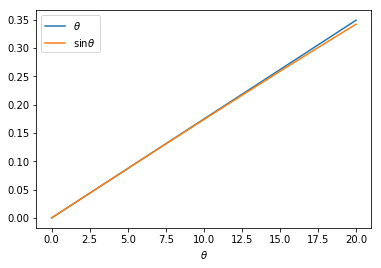

In [2]:
θ = np.linspace(0, 20, 100+1) # Variando theta de 0 a 20 graus, a cada 0.2 graus
θ_rad =  np.deg2rad(θ) # Precisamos dos valores em radianos
pl_linear, = plt.plot(θ, θ_rad, label=r'$\theta$') # Plota θ no eixo x e θ_rad no eixo y.
                                                   # label dá o texto que descreve a curva (aqui usando LaTeX)
pl_sin, = plt.plot(θ, np.sin(θ_rad), label=r'$\sin\theta$') # Plota θ no eixo x e sin(θ) no y
plt.xlabel(r'$\theta$') # xlabel indica o nome que aparece no eixo x. ylabel seria para o eixo y.
plt.legend(handles=[pl_linear, pl_sin]) # Solicita a criação de uma legenda para as duas curvas.
plt.show()

Podemos ver que para ângulos pequenos (menores que 10°) há pouca diferença entre $\sin\theta$ e $\theta$.

A equação aproximada fica então

$$ \frac{d^2\theta}{dt^2} = -\frac{g}{\ell}\theta$$

que é uma equação linear e pode ser resolvida por métodos tradicionais, resultando em

$$\theta(t) = \theta_0\cos(\omega_0 t - \phi),$$

onde $\theta_0$ é o ângulo inicial, $\omega_0 = \sqrt{g/\ell}$ é a denominada frequência angular natural do pêndulo e $\phi$ depende da velocidade inicial do pêndulo (pode ser encontrado de $v_0 = \theta_0\sqrt{g\ell}\sin\phi$).

### Fixando alguns parâmetros do pêndulo

A partir de agora vamos fixar um pêndulo com $\ell=9.8$ usando $g = 9.8m/s^2$ (de modo que $\omega_0=1$), sempre considerando a massa sendo largada do repouso (que resulta em $\phi=0$).

In [3]:
ℓ = 9.8 # ℓ é o comprimento
g = 9.8 # g a aceleração da gravidade
ω0 = np.sqrt(g/ℓ)
T0 = 2 * np.pi / ω0 # Período da oscilação natural

### Discretização do tempo

Ao realizar cálculos numéricos ou visualização no computador, precisamos discretizar todas as funções contínuas. Ao discretizar no tempo precisamos fixar a definição temporal (intervalo entre dois instantes de tempo computados), o tempo total e o número total de instantes de tempo avaliados. Vamos definir uma função para ajudar a calcular fatores de temporização. Como estamos lidando com funções oscilantes, nos baseamos no tempo de um ciclo de oscilação. Então a função recebe o número de ciclos desejados, o tempo um ciclo e, opcionalmente, o número de intervalos de tempo em um ciclo; caso este último argumento não seja fornecido, vamos assumir o valor 100. Com esses valores a função calcula e retorna (na ordem) o tempo total de simulação, o número total de pontos simulados e o intervalo de tempo entre dois pontos.

In [4]:
def timing(ncycles, T, n_per_cycle = 100):
    return (ncycles * T, ncycles * n_per_cycle, T / n_per_cycle)

### Visualizando a solução analítica para alguns valores de $\theta_0$

Calculamos e mostramos então o solução para 5 ciclos de oscilação:

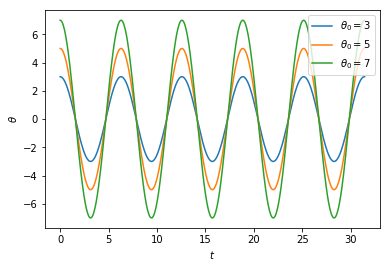

In [5]:
tmax, nintervals, _ = timing(5, T0) # 5 ciclos. Uso de _ diz que estamos descartando este valor (sem interesse aqui).
t = np.linspace(0, tmax, nintervals)
hndl = []
some_θs = [3, 5, 7]
for θ0 in some_θs:
    h, = plt.plot(t, θ0*np.cos(ω0 * t), label=r'$\theta_0 = ' + str(θ0) + '$')
    hndl.append(h)
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend(handles=hndl)
plt.show()

### Solucionando a equação diferencial numericamente

Uma atividade interessante é solucionar computacionalmente essa equação e comparar o resultado com o esperado pela solução apresentada acima.

Para isso, precisamos reescrever a equação diferencial como um sistema de equações de primeiro grau (pois isso é requerido pela função para solução numérica de equações diferenciais que vamos usar), da seguinte forma:

\begin{eqnarray}
  \frac{dx_1}{dt} & = & f_1(x_1, x_2, \ldots, x_n, t)\\
  \frac{dx_2}{dt} & = & f_2(x_1, x_2, \ldots, x_n, t)\\
  \vdots \\
  \frac{dx_n}{dt} & = & f_n(x_1, x_2, \ldots, x_n, t)\\
\end{eqnarray}

O sistema é então definido pelo conjunto de funções $f_i$, pois dado o estado (valores dos diversos $x_i$) e tempo atuais, podemos calcular o valor de todas as derivadas usando as expressões das funções $f_i$, possibilitando o conhecimento da trajetória do sistema.

No nosso caso, temos uma equação de segundo grau, então precisamos escrevê-la como duas equações de primeiro grau. A forma natural de fazer isto neste caso é definirmos as duas variáveis:

\begin{eqnarray}
  x & = & \theta \\
  y & = & \frac{d\theta}{dt}
\end{eqnarray}

Com isso, ficamos com o sistema de equações:

\begin{eqnarray}
  \frac{dx}{dt} & = & y \\
  \frac{dy}{dt} & = & - \frac{g}{\ell} x
\end{eqnarray}

Com isso feito, podemos usar a função `odeint` do SciPy para fazer a integração das equações diferenciais, lembrando que $x(t=0) = \theta_0$ e $y(t=0) = 0$ (pois partimos do repouso).

Primeiro precisamos definir uma função para o cálculo das funções $f_i$ dado um tempo e os valores correntes de x e y. Conforme requerido pela `odeint`,  o primeiro parâmetro para essa função é tal que, se o parâmetro se chama `xy` então `xy[i]` deve dar o valor atual da correspondente variável. Qual variável corresponde a qual posição deve ser escolhido pelo programador, e mantido consistente por todo o código.  Aqui, escolhemos que `xy[0]` corresponde à variável $x(t)$ enquanto `xy[1]` corresponde à variável $y(t)$. O segundo parâmetro é o tempo corrente. Demais parâmetros são opcionais, e dependem do que estamos modelando: eles podem ser usados para passar parâmetros próprios do sistema. Em nosso caso, o valor da aceleração da gravidade e comprimento da haste.

A função deve retornar, em ordem, os valores das $f_i$ calculadas para os valores passados das variáveis e do tempo. No nosso exemplo atual, o sistema é independente do tempo, então o tempo não será usado.

In [6]:
def simple_linear_pendulum(xy, t, g, ℓ):
    x, y = xy # Separamos os componentes x e y do estado
    return y, - g / ℓ * x # retornamos funções das derivadas em x e derivada em y nas equações

Agora basta usar essa função para resolver o sistema:

In [7]:
from scipy.integrate import odeint

In [8]:
# Definimos uma função para fazer o cálculo deste sistema, dados os parâmetros.
# Isto evita repetição de código abaixo.
def simulate_simple_linear_pendulum(θ0, tmax, nintervalos, g, ℓ):
    θ0_rad = np.deg2rad(θ0)
    t = np.linspace(0, tmax, nintervalos + 1) # Instantes de tempo para os quais queremos resultados
    xy0 = [θ0_rad, 0.0] # Estado inicial
    xy = odeint(simple_linear_pendulum, xy0, t, args=(g, ℓ)) # Resolve sistema de equações definido por deriv_simples,
                                                             # Partindo do estado inicial xy0 para os instante t
    return t, np.rad2deg(xy) # Retorna um par: instantes e correspondentes estados (em graus)

In [9]:
θ0 = 5.
ncycles = 5 # número de ciclos a simular
tmax, nintervals, _ = timing(ncycles, T0)
t, xy = simulate_simple_linear_pendulum(θ0, tmax, nintervals, g, ℓ)

Agora basta plotar o resultado juntamente com a solução exata para comparação:

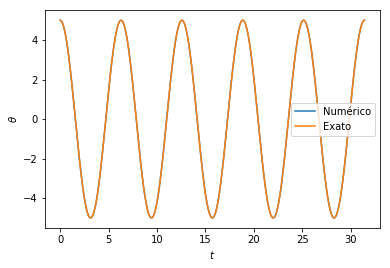

In [10]:
exact = θ0 * np.cos(np.sqrt(g/ℓ)*t) # Valor da solução analítica
pn, = plt.plot(t, xy[:, 0], label='Numérico')
pe, = plt.plot(t, exact, label='Exato')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend(handles=[pn, pe])
plt.show()

Não é possível distinguir visualmente entre as duas soluções, o que é um bom sinal. Vejamos a diferença entre os resultados diretamente:

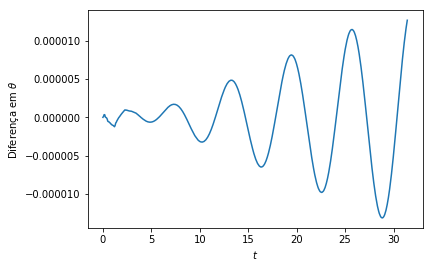

In [11]:
plt.plot(t, xy[:, 0] - exact)
plt.xlabel(r'$t$')
plt.ylabel(r'Diferença em $\theta$')
plt.show()

Note que, como a amplitude da oscilação é 5.0, a amplitude do erro é várias ordens de grandeza menor. No entanto, notamos uma tendência a crescimento do erro com o tempo, o que indica que a solução numérica não é confiável para intervalos de tempo muito grandes.

Vamos primeiramente tentar aumentar o número de intervalos simulados no mesmo tempo total (aumentando a resulução temporal) para ver se isso tem algum efeito.

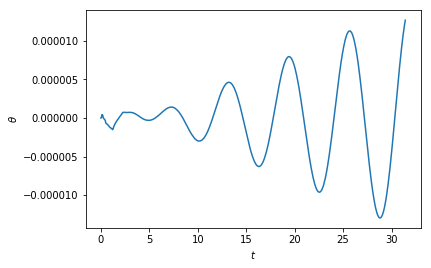

In [12]:
tmax, nintervals, _ = timing(ncycles, T0, n_per_cycle=1000)
t, xy = simulate_simple_linear_pendulum(θ0, tmax, nintervals, g, ℓ) # Simlando para intervalos 10 vezes menores
exact = θ0*np.cos(np.sqrt(g/ℓ)*t)
plt.plot(t, xy[:,0] - exact)
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.show()

Não se nota diferença significativa, o que mostra que a definição em tempo da simulação anterior já era adequada. Vamos agora realizar a simulação por mais tempo:

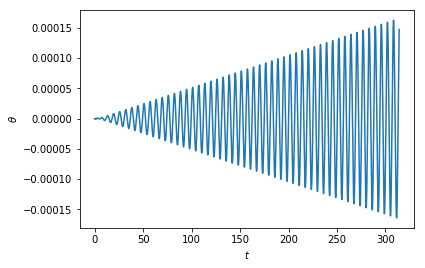

In [13]:
tmax, nintervals, _ = timing(50, T0)
t, xy = simulate_simple_linear_pendulum(θ0, tmax, nintervals, g, ℓ) # Simula por 50 ciclos
exact = θ0*np.cos(np.sqrt(g/ℓ)*t)
plt.plot(t, xy[:, 0] - exact)
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.show()

Veja que há um crescimento quase linear da amplitude do erro com o tempo. Portanto se desejarmos podemos avaliar, dada uma precisão aceitável, até que ponto a simulação pode ser levada adiante.

### Espaço de fase (espaço de estado)

Um outro gráfico interessante é o chamado *gráfico de espaço de fase* (ou *espaço de estado*), que consiste em plotar posição contra velocidade. No nosso caso, ângulo contra velocidade angular. Como sabemos, se comenhecemos as equações diferenciais que descrevem o sistema, com a posição e a velocidade em um dado instante todas as posições e velocidades posteriores são determinadas, formando uma trajetória no espaço de fase. Isto é, a trajetória no espaço de fase diz tudo o que desejamos saber sobre o movimento do sistema.

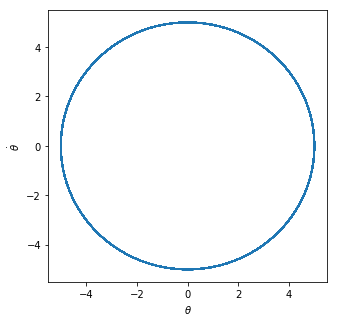

In [14]:
plt.figure(figsize=(5,5))
plt.plot(xy[:,0], xy[:,1])
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.show()

No nosso caso, vemos que a trajetória é fechada em um **ciclo**, isto é, o sistema repete continuamente seu estado.

## Parte 2: Pêndulo simples (regime não-linear)

A questão agora é a seguinte: O que acontece se o ângulo $\theta$ não é necessariamente pequeno? Neste caso, não temos uma solução exata, mas podemos usar o mesmo método para a solução numérica. Voltando à equação original,

$$\frac{d^2\theta}{dt^2} = - \frac{g}{\ell}\sin\theta,$$

fazemos a transformação

\begin{eqnarray}
  x & = & \theta \\
  y & = & \frac{d\theta}{dt}
\end{eqnarray}

Chegando a:

\begin{eqnarray}
  \frac{dx}{dt} & = & y \\
  \frac{dy}{dt} & = & - \frac{g}{\ell} \sin x
\end{eqnarray}

Com o qual podemos montar a solução usando SciPy.

In [15]:
def simple_nonlinear_pendulum(xy, t, g, ℓ):
    x, y = xy
    return y, -g/ℓ * np.sin(x)

In [16]:
def simulate_simple_nonlinear_pendulum(θ0, tmax, nintervals, g, ℓ):
    θ0_rad = np.deg2rad(θ0)
    t = np.linspace(0, tmax, nintervals + 1)
    xy0 = [θ0_rad, 0.]
    xy = odeint(simple_nonlinear_pendulum, xy0, t, args=(g, ℓ))
    return t, np.rad2deg(xy)

In [17]:
# Uma função para fazer comparação da solução linear com a não-linear, dados os parâmetros.
def compare_nonlinearity(θ0, tmax, nintervals, g, ℓ):
    t, xy = simulate_simple_nonlinear_pendulum(θ0, tmax, nintervals, g, ℓ)
    linear = θ0*np.cos(np.sqrt(g/ℓ) * t)
    pn, = plt.plot(t, xy[:,0], label='Não-linear')
    pl, = plt.plot(t, linear, label='Linear')
    plt.xlabel(r'$t$')
    plt.ylabel(r'$\theta$')
    plt.legend(handles=[pn, pl])
    plt.show()

Fixando o intervalo de tempo e número de intervalos:

In [18]:
ncycles = 5
tmax, nintervals, _ = timing(ncycles, T0)

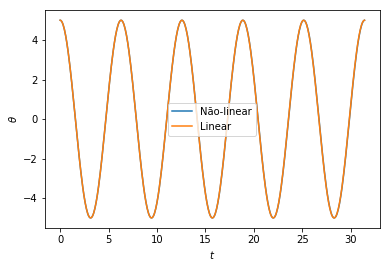

In [19]:
compare_nonlinearity(5.0, tmax, nintervals, g, ℓ)

Note como para $\theta_0$ pequeno não se vê diferença entre o sistema não-linear e o linear. Vejamos agora com um ângulo inicial maior.

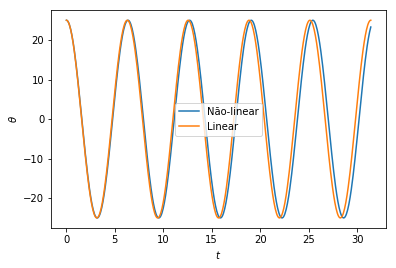

In [20]:
compare_nonlinearity(25.0, tmax, nintervals, g, ℓ)

Aqui já começamos a ver que o sistema não linearizado apresenta uma frequência menor de operação. Vejamos para um ângulo inicial ainda maior.

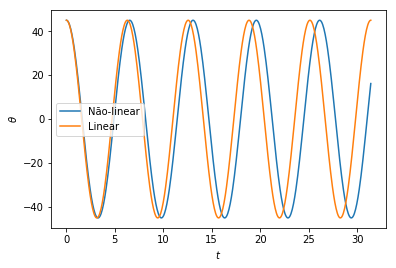

In [21]:
compare_nonlinearity(45., tmax, nintervals, g, ℓ)

Mantendo a tendência de diminuir a frequência com o aumento de $\theta_0$. Mais dois ângulos maiores:

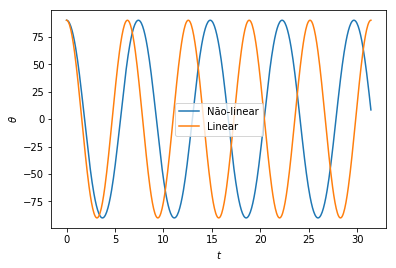

In [22]:
compare_nonlinearity(90., tmax, nintervals, g, ℓ)

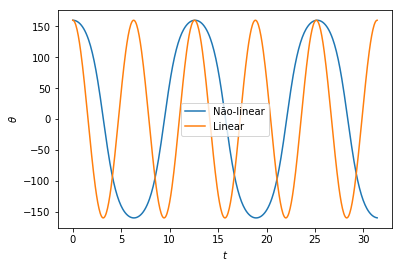

In [23]:
compare_nonlinearity(160., tmax, nintervals, g, ℓ)

Note como neste último caso fica também claro que o formato da onda, antes aparentemente senoidal, é dependente do ângulo inicial.

Vemos que o modelo linear, como esperado, é completamente inadequado para descrever o sistema real, que apresenta não-linearidade, quando fora do regime perturbativo.

Para concluir esta parte, vejamos o espaço de fase do sistema não linear para este último valor de $\theta_0$:

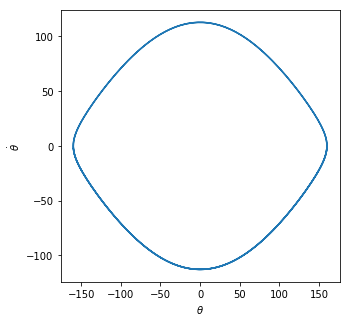

In [24]:
t, xy00 = simulate_simple_nonlinear_pendulum(160., tmax, nintervals, g, ℓ)
plt.figure(figsize=(5,5))
plt.plot(xy00[:,0], xy00[:,1])
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.show()

Note como a figura não tem mais um formato circular, porém continua sendo uma figura fechada, característica de um sistema periódico (volta regularmente ao mesmo estado inicial, de onde a trajetória se repete).

## Parte 3: Atrito

Já que não precisamos mais nos prender a estudar o que pode ser resolvido analiticamente, vamos agora introduzir um novo elemento no sistema. Até agora, as forças atuando nos pêndulos eram conservativas. Num pêndulo real, haverá atuação de outras forças não-conservativas, as mais importantes se referindo a atrito na junção onde o pêndulo se prende ao teto e resistência do ar. Felizmente para nosso modelamento, nas baixas velocidades típicas de um pêndulo, essas duas forças são aproximadamente proporcionais à velocidade. (Para altas velocidades a resistência do ar é proporcional ao quadrado da velocidade). Vamos então introduzir uma força da forma $-q\frac{d\theta}{dt}$, onde $q>0$ é um coeficiente efetivo que engloba as duas contribuições e o sinal negativo indica que a força é contrária à direção de deslocamento do pêndulo.

Ficamos então com o seguinte sistema (usando nossas coordenadas $x$ e $y$ como anteriormente):

\begin{eqnarray}
  \frac{dx}{dt} & = & y \\
  \frac{dy}{dt} & = & -\frac{g}{\ell}\sin x - q y.
\end{eqnarray}

Esse sistema pode ser simulado como abaixo.

In [25]:
def dissipative_nonlinear_pendulum(xy, t, g, ℓ, q):
    x, y = xy
    return y, -g/ℓ*np.sin(x)-q*y

In [26]:
def simulate_dissipative(θ0, tmax, nintervals, g, ℓ, q):
    θ0_rad = np.deg2rad(θ0)
    t = np.linspace(0, tmax, nintervals + 1)
    xy0 = [θ0_rad, 0.]
    xy = odeint(dissipative_nonlinear_pendulum, xy0, t, args=(g, ℓ, q))
    return t, np.rad2deg(xy)

### Fixando um valor de $\theta_0$

Vamos a partir de agora fixar $\theta_0 = 12$.

In [27]:
θ0 = 12.0

### Comparando alguns valores de $q$

In [28]:
ncycles = 4
tmax, ninvervals, _ = timing(ncycles, T0)
some_qs = [0.0, 0.5, 1.0, 2.0] # q=0 é o mesmo que sem atrito

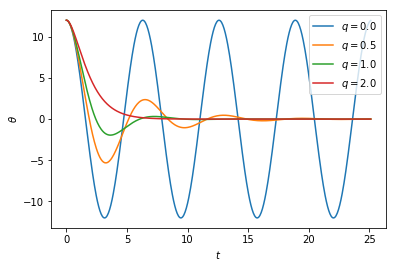

In [30]:
hndl = []
xys = []
for q in some_qs:
    t, xy = simulate_dissipative(θ0, tmax, nintervals, g, ℓ, q)
    h, = plt.plot(t, xy[:, 0], label=r'$q=' + str(q) + '$')
    hndl.append(h)
    xys.append(xy)

plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend(handles=hndl)
plt.show()

Vemos que as oscilações decaem rapidamente, e mais rapidamente quanto maior o coeficiente de atrito, conforme esperado. Vejamos esses mesmos resultados no espaço de fase.

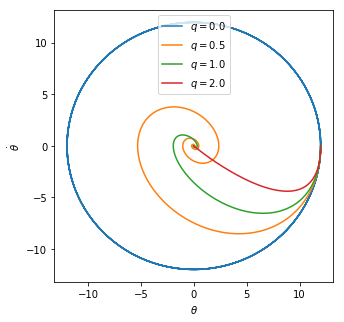

In [31]:
plt.figure(figsize=(5,5))
hndl = []
for i, q in enumerate(some_qs):
    h, = plt.plot(xys[i][:,0], xys[i][:,1], label=r'$q='+str(q)+'$')
    hndl.append(h)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot\theta$')
plt.legend(handles=hndl)
plt.show()

As trajetórias no espaço de fase tendem rapidamente para o ponto $(0,0)$, que é o ponto de energia nula, devido à perda de energia por atrito. Um ponto para o qual as trajetórias tendem é denominado um **ponto fixo**.

## Parte 4: Força externa

Vamos agora acrescentar um novo elemento: uma força externa atuando sobre o sistema. Para termos um comportamento mais interessante, essa força externa terá um formato senoidal com frequência angular $\omega_F$ e amplitude $f$ dadas, isto é, terá a forma $ f\sin(\omega_F t)$.

Nosso sistema fica então:

\begin{eqnarray}
  \frac{dx}{dt} & = & y \\
  \frac{dy}{dt} & = & -\frac{g}{\ell}\sin x - q y + f \sin \omega_F t.
\end{eqnarray}

Para simular este sistema seguimos o mesmo procedimento anterior, mas iremos tomar um cuidado adicional: Como existe uma força externa além da gravidade, é possível que o pêndulo passe acima de seu ponto de origem, podendo inclusive "rodar" para o outro lado. Para manter os ângulos dentro de uma faixa específica (para facilitar os gráficos) vamos então continuamente manter os ângulos na faixa $[-180º, 180º)$.

In [32]:
def normalize_angle(angle):
    return (angle + 180.) % 360. - 180.

In [33]:
def forced_dissipative_nonlinear_pendulum(xy, t, g, ℓ, q, f, ωf):
    x, y = xy
    return y, -g/ℓ*np.sin(x)-q*y+f*np.sin(ωf*t)

In [34]:
def simulate_forced(θ0, tmax, nintervals, g, ℓ, q, f, ωf):
    θ0_rad = np.deg2rad(θ0)
    t = np.linspace(0, tmax, nintervals + 1)
    xy0 = [θ0_rad, 0.]
    xy = odeint(forced_dissipative_nonlinear_pendulum, xy0, t, args=(g, ℓ, q, f, ωf))
    return t, np.rad2deg(xy)

Vamos fixar $q=0.5$ e $\omega_F = 2/3$, e usar $f$ como parâmetro e ajustar o intervalo de $t$. Também, agora calculamos a temporização com base na frequência forçante:

In [35]:
q = 0.5
ωf = 2./3.
Tf = 2 * np.pi / ωf
ncycles = 10
tmax, nintervals, _ = timing(ncycles, Tf)

Primeiro vejamos um exemplo para um valor pequeno de $f$:

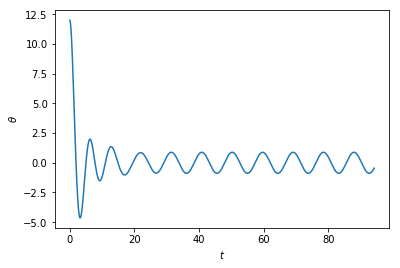

In [36]:
f = 0.01
t, xy = simulate_forced(θ0, tmax, nintervals, g, ℓ, q, f, ωf)
q01 = normalize_angle(xy[:,0])
p01, = plt.plot(t, xy[:, 0])
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.show()

Note como o sistema começa oscilando de acordo com a sua frequência natural, mas com o amortecimento que desgasta a energia inicialmente fornecida, passa a ser dominado pela frequência da força externa.

Vamos comparar alguns valores diferentes para $f$.

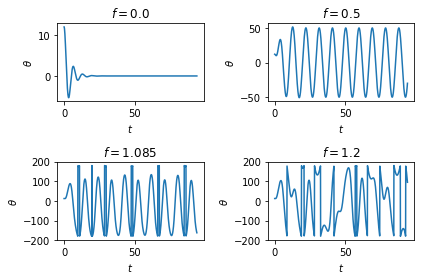

In [37]:
# Uma função auxiliar para plotar resultados para um f específico
def subplot_f(f, subindex):
    return p, xy

fs = [0.0, 0.5, 1.085, 1.2]
xys = []
for i, f in enumerate(fs):
    t, xy = simulate_forced(θ0, tmax, nintervals, g, ℓ, q, f, ωf)
    xy[:, 0] = normalize_angle(xy[:,0])
    plt.subplot(2, 2, i+1)
    plt.title(r'$f='+str(f)+r'$')
    plt.plot(t, xy[:, 0])
    plt.xlabel(r'$t$')
    plt.ylabel(r'$\theta$')
    xys.append(xy)

plt.tight_layout()
plt.show()

É bastante interessante ver estes resultados no espaço de fase.

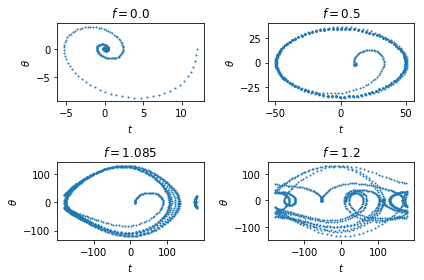

In [38]:
for i, f in enumerate(fs):
    plt.subplot(2, 2, i+1)
    plt.title(r'$f=' + str(fs[i])+'$')
    plt.plot(xys[i][:, 0], xys[i][:,1], 'o', markersize=1)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$\theta$')

plt.tight_layout()
plt.show()

Aqui plotamos apenas pontos, ao invés de linhas, para evitar linhas inexistentes nos dois gráficos de baixo. O resultado à esquerda acima, usando $f=0$ se reduz aos resultados anteriores, com um ponto fixo na origem. No caso de $f=0.5$ já vemos um comportamento mais interessante: ao invés de um ponto-fixo, a trajetória tende ao que é denominado um ciclo-limite (tende ao ciclo de oscilação determinado pela força externa). Mas para forças maiores, o comportamento é ainda mais interessante. No caso $f=1.085$ o sistema percorre uma maior região do espaço de estado antes de se aproximar do ciclo limite. No caso de $f=1.2$ não vemos tendência a um ponto fixo ou a um ciclo limite. Vamos avaliar o sistema por um tempo maior, para verificar o que ocorre.

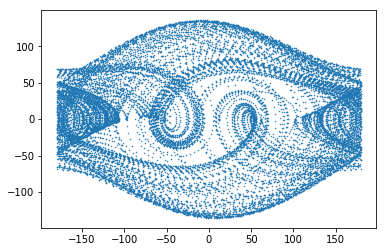

In [39]:
ncycles = 200
tmax, nintervals, _ = timing(ncycles, Tf)
t, xy200 = simulate_forced(θ0, tmax, nintervals, g, ℓ, q, 1.2, ωf)
f200 = normalize_angle(xy200[:,0])
plt.plot(f200, xy200[:,1], '.', markersize=1)
plt.show()

Não vemos uma repetição da trajetória, ao contrário, uma ampla região do espaço de estado é explorada. 

## Parte 5: Sensibilidade a condições iniciais

Vamos agora avaliar agora um outro aspecto do sistema: Vejamos o que acontece quando o sistema se desenvolve a partir de condições iniciais ligeiramente diferentes (continuamos com velocidade inicial zero, mas variamos ligeiramente o ângulo inicial). Avaliaremos então a diferença (absoluta) entre as duas trajetórias com a passagem do tempo.

Primeiramente, para $f=0.1$.

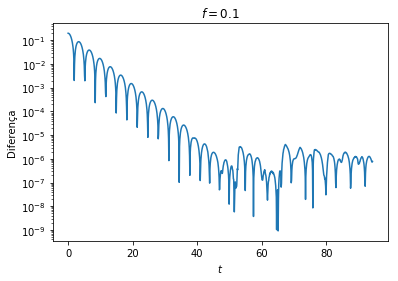

In [40]:
θ0 = 12. # Ângulo inicial
Δθ0 = 0.2
θ0prime = θ0 + Δθ0 # Ângulo inicial ligeiramente modificado

ncycles = 10
tmax, nintervals, _ = timing(ncycles, Tf)

f = 0.1

t, xy_0 = simulate_forced(θ0,      tmax, nintervals, g, ℓ, q, f, ωf)
t, xy_1 = simulate_forced(θ0prime, tmax, nintervals, g, ℓ, q, f, ωf)

plt.plot(t, np.abs(normalize_angle(xy_0[:, 0] - xy_1[:, 0])))
plt.yscale('log')
plt.xlabel(r'$t$')
plt.ylabel(r'Diferença')
plt.title(r'$f=' + str(f) + r'$')
plt.show()

Note como a diferença entre as trajetórias decai rapidamente. Na verdade, usamos a escala logaritmica no eixo das diferenças para mostrar que a queda tem tendência exponencial. Isto é,

$$ | \Delta\theta | \approx e^{\lambda t}, $$

onde $\lambda$ é negativo neste caso.

Agora vejamos o que acontece para $f=1.2$. (Para mostrar melhor o comportamento, começamos com um valor bem menor de diferença nos ângulos iniciais.)

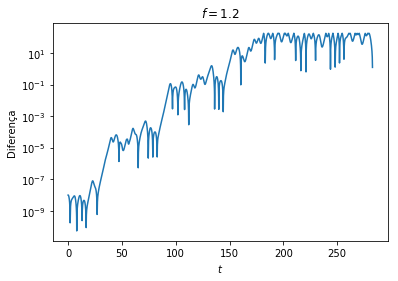

In [41]:
θ0 = 12.
Δθ0 = 0.00000001
θ0prime = θ0 + Δθ0

ncycles = 30
tmax, nintervals, _ = timing(ncycles, Tf)

f = 1.2

t, xy_0 = simulate_forced(θ0,      tmax, nintervals, g, ℓ, q, f, ωf)
t, xy_1 = simulate_forced(θ0prime, tmax, nintervals, g, ℓ, q, f, ωf)

plt.plot(t, np.abs(normalize_angle(xy_0[:, 0] - xy_1[:, 0])))
plt.yscale('log')
plt.xlabel(r'$t$')
plt.ylabel(r'Diferença')
plt.title(r'$f=' + str(f) + r'$')
plt.show()

Vemos que neste caso o comportamento é oposto: a diferença entre as trajetórias continua seguindo uma tendência da forma

$$ |\Delta\theta| \approx e^{\lambda t}, $$

mas agora o coeficiente $\lambda$ é **positivo**! Isto significa que **qualquer pequena diferença nas condições inciais será amplificada rapidamente**, resultando em que o comportamento do sistema é na prática impossível de prever, visto que não é possível uma precisão perfeita na determinação das condições iniciais. Esta é uma característica dos sistemas denominados **caóticos**.

## Parte 6: Seção de Poincaré

Uma técnica útil na análise de sistemas dinâmicos é a denominada *seção de Poincaré*, ou *mapa de Poincaré*, que é essencialmente a interseção de uma trajetória no espaço de fase com um espaço de menor dimensão (um subespaço) específico.

O subespaço a escolher depende do sistema e da análise desejada. No nosso caso, vamos plotar apenas os pontos que correspondem a instantes que satisfazem a relação $\omega_F t = 2n\pi$ onde $n$ é um inteiro. Isto é, estamos plotando apenas os pontos onde a trajetória está em fase com a força externa aplicada. Devido às aproximações numéricas, devemos na verdade plotar um ponto se ele satisfizer $|t - 2n\pi/\omega_F| < \Delta t/2$ para algum valor de $\Delta t$ apropriado. No nosso caso, usaremos para $\Delta t$ o valor do intervalo entre amostras no sistema simulado, visto que não há precisão temporal maior do que essa em nossos resultados.

Vamos fazer uma função que dado um array de valores de tempo, o tempo de ciclo e a precisão de tempo $\Delta t$ seleciona todos os índices (retornando um vetor de booleanos) que estão sincronizados com o ciclo de acordo com a expressão acima:

In [42]:
def select_synchronized(t, Tf, Δt):
    return np.abs(np.mod(t+Tf/2, Tf) - Tf/2) < Δt/2

In [43]:
q = 0.5
ncycles = 200
tmax, nintervals, Δt = timing(ncycles, Tf)

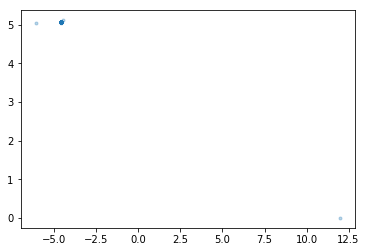

In [44]:
f = 0.1

t, xy = simulate_forced(θ0, tmax, nintervals, g, ℓ, q, f, ωf)
traj = normalize_angle(xy[:, 0])

selected = select_synchronized(t, Tf, Δt)

plt.plot(traj[selected], xy[selected, 1], 'o', markersize=3, alpha=0.3) # Plota apenas esses pontos
plt.show()

Note como, com exceção de alguns pontos devidos ao transiente inicial, os pontos agora se acumulam em um mesmo local. A razão é simples: depois do transiente inicial, o sistema assume uma trajetória periódica de acordo com a frequência da força externa, e portanto, se olhamos a intervalos determinados pelo período dessa oscilação, encontraremos o pêndulo sempre no mesmo ponto.

Vejamos agora o que acontece no caso caótico.

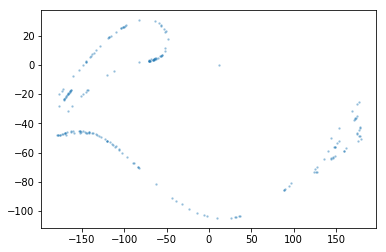

In [45]:
f = 1.2

t, xy = simulate_forced(θ0, tmax, nintervals, g, ℓ, q, f, ωf)
traj = normalize_angle(xy[:, 0])

selected = select_synchronized(t, Tf, Δt)

plt.plot(traj[selected], xy[selected, 1], '.', markersize=3, alpha=0.3)
plt.show()

O que acontece se deixamos o sistema executar por mais tempo?

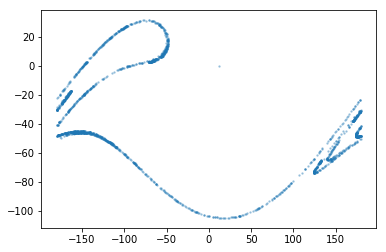

In [46]:
ncycles = 2000
tmax, nintervals, Δt = timing(ncycles, Tf)

t, xy = simulate_forced(θ0, tmax, nintervals, g, ℓ, q, f, ωf)

traj = normalize_angle(xy[:, 0])
selected = select_synchronized(t, Tf, Δt)

plt.plot(traj[selected], xy[selected, 1], '.', markersize=3, alpha=0.3)
plt.show()

Note como o formato ficou o mesmo. Quer dizer, apesar de toda a característica caótica do sistema, ele é atraído a uma região específica do espaço de estado, denominado um **atrator**. A estrutura dos atratores no regime caótico é bastante complexa, tendo dimensionalidades fracionárias (o número de dimensões do espaço do atrator não é um número inteiro), e portanto são denominados **fractais**; os atratores fractais são denominados de **atratores estranhos**.

## Parte 7: Duplicação de período

Vamos analisar o regime estacionário para diferentes parâmetros de amplitude da força externa ($f$). Para isso, simulamos o sistema para um grande número de ciclos e descartamos todos os resultados com exceção dos últimos ciclos, que mostrarão o funcionamento do sistema após o término do transiente.

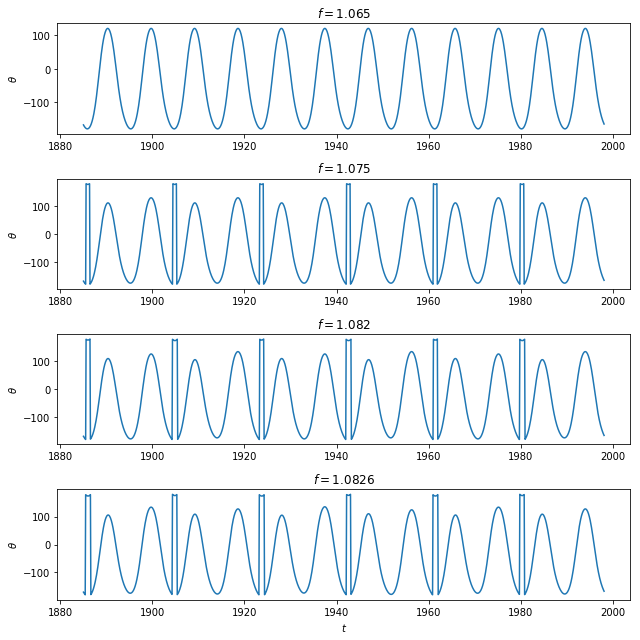

In [47]:
ncycles = 212 # Número total de ciclos a simular
samples_per_cycle = 100 # Número de pontos amostrados por ciclo
tmax, nintervals, _ = timing(ncycles, Tf, samples_per_cycle)
ncycles_discard = 200 # Número de ciclos a descartar (evitando o transiente)
ndiscard = ncycles_discard * samples_per_cycle # Número de amostras descartadas

plt.figure(figsize=(9,9))
fs = [1.065, 1.075, 1.082, 1.0826] # Alguns valores de f
for i, f in enumerate(fs):
    t, xy = simulate_forced(θ0, tmax, nintervals, g, ℓ, q, f, ωf)
    traj = normalize_angle(xy[:, 0])
    
     # Seleciona os valores não descartados
    to_keep = np.arange(nintervals+1) > ndiscard # Calcula os indices a manter
    traj_steady = traj[to_keep]
    t_steady = t[to_keep]
    
    # plota os gráficos
    plt.subplot(len(fs), 1, i+1)
    plt.plot(t_steady, traj_steady)
    plt.ylabel(r'$\theta$')
    plt.title(r'$f='+str(f)+r'$')
plt.xlabel(r'$t$')
plt.tight_layout()

Note que para $f=1.065$, no regime estacionário a oscilação tem um período igual ao da força externa (no caso dos parâmetros usados, $T_F = 3\pi$).

Já para $f=1.075$, os picos oscilam alternadamente de altura, o que significa que o período de repetição é dobrado. Para $f=1.082$ temos 4 picos de valores diferentes antes da repetição, o que implica um período quadruplicado em relação ao original. Para $f=1.0826$ temos 8 picos distintos, apesar de isso ser muito difícil de enxergar na figura. Esse processo de duplicação se repete indefinidamente, com intevalos entre os valores de $f$ para a duplicação cada vez menores, até que chegamos no regime caótico. Essa **duplicação de período** é típica em vários sistemas caóticos.

### Diagrama de bifurcação

Uma forma tradicional de analisar o processo de duplicação de período na transição para o caos é através da construção de um **diagrama de bifurcação** para analisarmos os pontos onde a duplicação de período ocorre.

Para o nosso sistema usamos a mesma técnica da seção de Poincaré para extrair os pontos em fase com força externa e plotamos, para cada valor de $f$, todos os valores encontrados nesses pontos dentro do regime estacionário.

*OBS:* A execução do código abaixo é demorada, pois realiza um grande número de simulações.

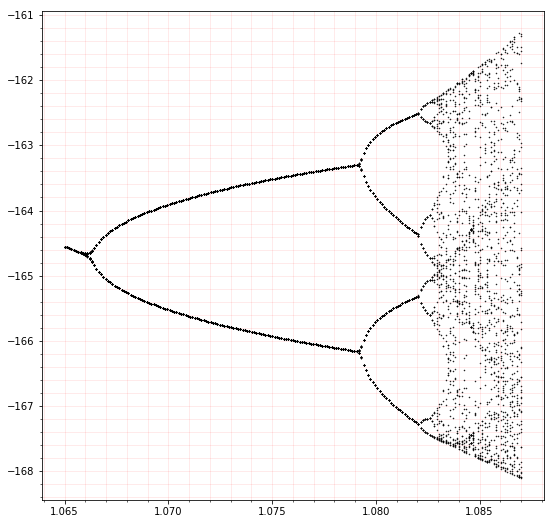

In [48]:
# Faixa de valores de f a simular
fs = np.linspace(1.065,  1.087, 200+1)

# Parâmetros da simulação
ncycles = 250
ncycles_discard = 200
samples_per_cycle = 100
tmax, nintervals, Δt = timing(ncycles, Tf, samples_per_cycle)
ndiscard = ncycles_discard * samples_per_cycle

plt.figure(figsize=(9,9))
for f in fs:
    t, xy = simulate_forced(θ0, tmax, nintervals, g, ℓ, q, f, ωf)
    traj = normalize_angle(xy[:, 0])
    selected = select_synchronized(t, Tf, Δt) # Selecionados pela seção de Poincaré
    traj_steady = traj[selected & (np.arange(nintervals+1) > ndiscard)] # Pega apenas os não-descartados
    # Plota todos os pontos no mesmo valor de f
    plt.plot(f * np.ones_like(traj_steady), traj_steady, 'k.', markersize=1)
plt.minorticks_on()
plt.grid(which='both', color='r', alpha=0.1)
plt.show()

Note como até um pouco acima de $f=1.066$ a trajetória atinge sempre o mesmo ponto (para um dado $f$). Um pouco acima disso já são atingidos dois pontos distintos. Isso é uma marca de que o período de oscilação é o dobro do período de amostragem. Por volta de $f=1.079$ há uma nova duplicação (cada um dos pontos anteriores é dividido em dois). Próximo a $f=1.082$ há outra duplicação. Esse processo em princípio se repete indefinidamente, com o intervalo entre um ponto de duplicação e outro diminuindo exponencialmente, até que se atinge o ponto de caos.

Vale a pena você fazer mudanças na faixa de $f$ usada para entender melhor o sistema.